In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/breast_cancer.csv", index_col=0)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
# df 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         569 no

In [3]:
# 컬렴명 확인
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

- 예측해야하는 값은 label이다.

### 레이블을 확인하는 이유
- 레이블(Label)은 분류(Classification) 문제에서 목표 변수(타겟 변수, Y값) 를 의미
- 클래스 불균형(Class Imbalance) 확인
  - 예시) 이진 분류(0과 1) 문제에서 0 클래스 데이터: 950개 1 클래스 데이터: 50개 이면 모델이 대부분 0으로 예측해도 높은 정확도를 얻을 수 있지만, 실제 성능은 매우 낮은 결과값이 생긴다.
- 원-핫 인코딩(One-Hot Encoding) 또는 레이블 인코딩(Label Encoding) 시 필요
  - 레이블을 숫자로 변환해야 하지만, 레이블 개수를 모르면 잘못된 인코딩이 발생
- 데이터 분포를 파악하여 적절한 분석 방법을 선택
  - 균형 잡힌 데이터 → 일반적인 머신러닝 알고리즘 적용 가능
  - 불균형한 데이터 → 샘플링 기법 적용 필요

- 참고: https://chatgpt.com/share/67e3989a-ed0c-8011-9188-0a21111f3967

Text(0.5, 1.0, 'Label')

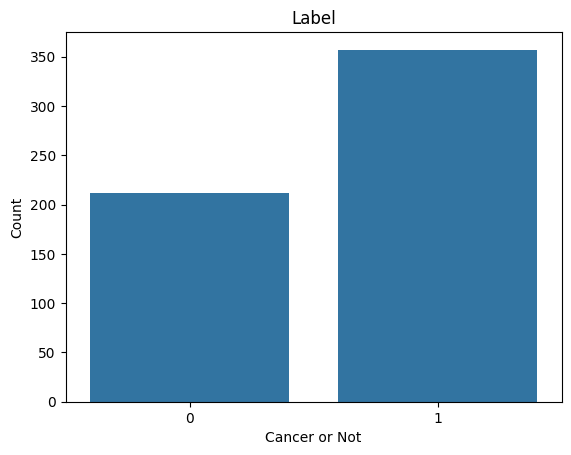

In [4]:
# 레이블 갯수 확인 (그래프)
import matplotlib.pyplot as plt

sns.countplot(data = df, x="label")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [5]:
# 레이블 갯수 확인 (숫자)
df['label'].value_counts()

# 레이블이 균형잡힌것을 확인할 수 있다.

,count
label,
1,357
0,212


In [6]:
# 결측치 확인
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [7]:
# 결측치 제거
df = df.dropna()

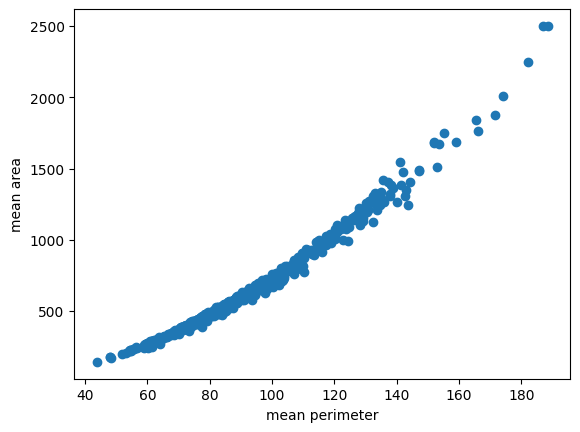

In [8]:
# 산점도 확인 1
plt.scatter(df['mean perimeter'], df['mean area'])
plt.xlabel('mean perimeter')
plt.ylabel('mean area')

plt.show()

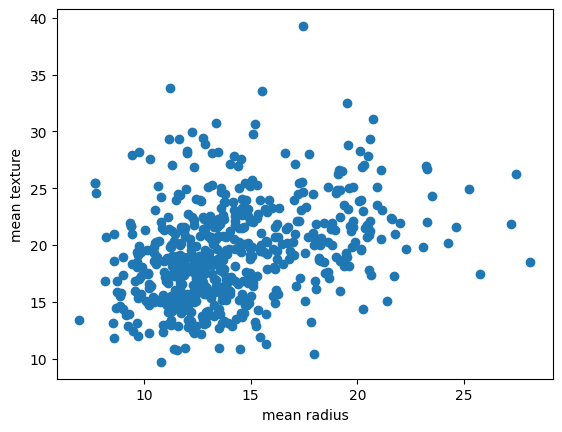

In [9]:
# 산점도 확인 2
plt.scatter(df['mean radius'], df['mean texture'])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.show()

<ipython-input-10-e955c61911c4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
<ipython-input-10-e955c61911c4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mean texture'], ax=ax2)


<Axes: xlabel='mean texture', ylabel='Density'>

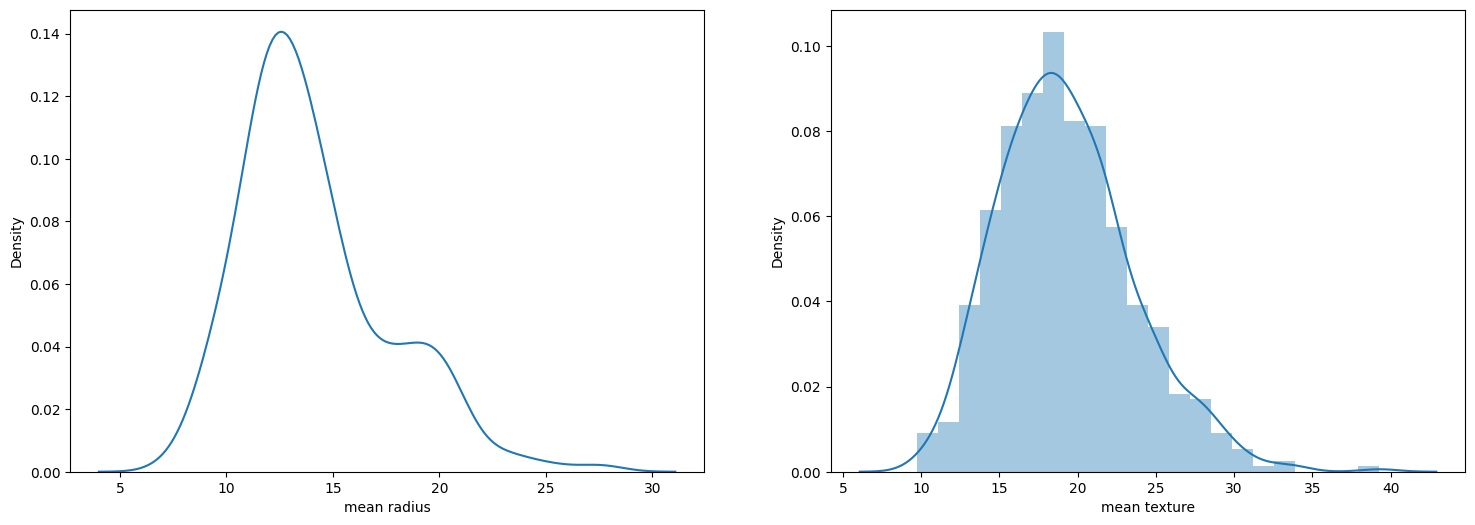

In [10]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['mean texture'], ax=ax2)

## seaborn.pairplot()
- 데이터셋의 모든 숫자형 변수 쌍(pair)에 대한 산점도(scatter plot)와 히스토그램을 그려주는 함수
- 데이터의 변수 간 관계를 한눈에 시각화

### hue = 'label'
- hue 매개변수를 지정해 Y값을 기준으로 색을 변화해서 보여준다.
- 여기선 cancer의 유무인 label을 지정하였다.

### seaborn.pairplot()로 얻을 수 있는 정보
- 변수 간의 관계 파악 (산점도)
  - X축과 Y축에 있는 변수들이 어떤 관계를 가지는지 확인 가능
  - 선형 관계, 비선형 관계, 군집(clustering) 여부 등을 알 수 있음
- 변수의 분포 확인 (히스토그램)
  - 대각선(↘)에는 각 변수의 히스토그램이 표시됨
  - 데이터가 어떤 형태(정규분포, 치우친 분포 등)인지 확인 가능

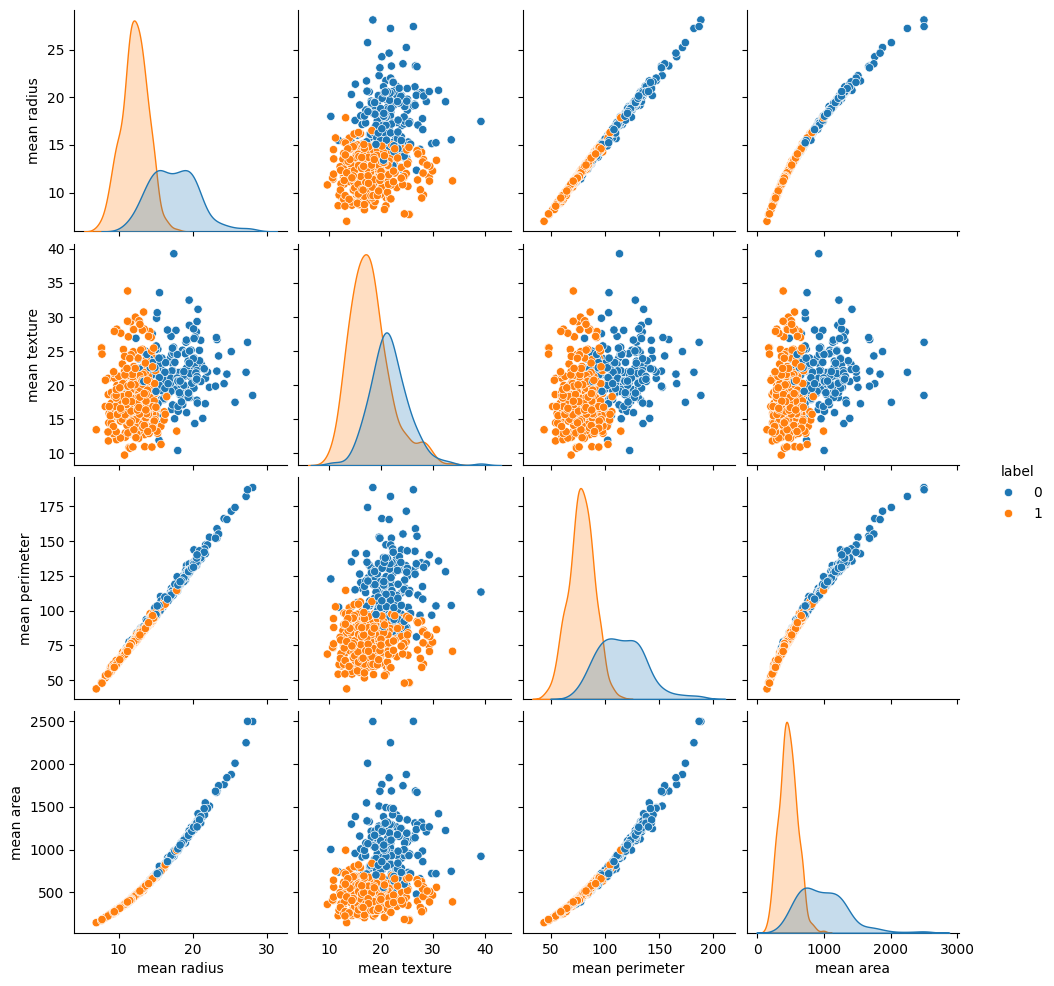

In [11]:
# pairplot를 사용해 각 상관관계 살펴보기
import seaborn as sns

sns.pairplot(df,vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],hue ='label')
plt.show()

## seaborn.boxplot()
- 데이터의 분포와 이상치를 시각적으로 확인할 수 있는 박스플롯(Box Plot)을 그려주는 함수
- 중앙값(중위수), 사분위 범위(IQR), 이상치(Outlier)를 한눈에 파악할 수 있음.
- 데이터의 분포를 비교하거나 이상치 탐지에 유용함.
- 참고: https://chatgpt.com/share/67e3989a-ed0c-8011-9188-0a21111f3967

<ipython-input-12-b2420d9f5189>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="mean radius", data=df, palette="Set3")


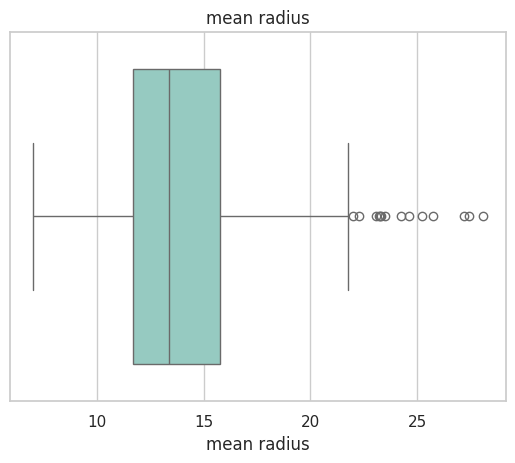

In [12]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="mean radius", data=df, palette="Set3")
plt.title("mean radius")
plt.show()

## 컬럼별 히스토그램
- 각 데이터 컬럼(변수)의 분포를 시각적으로 나타내는 그래프
  - X축: 데이터 값
  - Y축: 해당 값이 등장한 횟수(빈도)
- 각 변수(컬럼)의 값이 어떻게 분포되어 있는지 한눈에 확인할 수 있다.
- 데이터의 분포를 이해하고, 분석의 방향을 설정하기 위해서 확인한다.

### plt.figure
- ax = fig.gca(): 현재 figure의 축(Axes)를 가져와서 여러 개의 히스토그램을 한 번에 출력
- df.hist(): 데이터프레임의 모든 숫자형 컬럼에 대한 히스토그램을 자동으로 생성합니다.
- figsize=(15,20): 그래프 크기를 가로 15, 세로 20으로 설정하여 크게 표시

<ipython-input-13-130df1d1074f>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


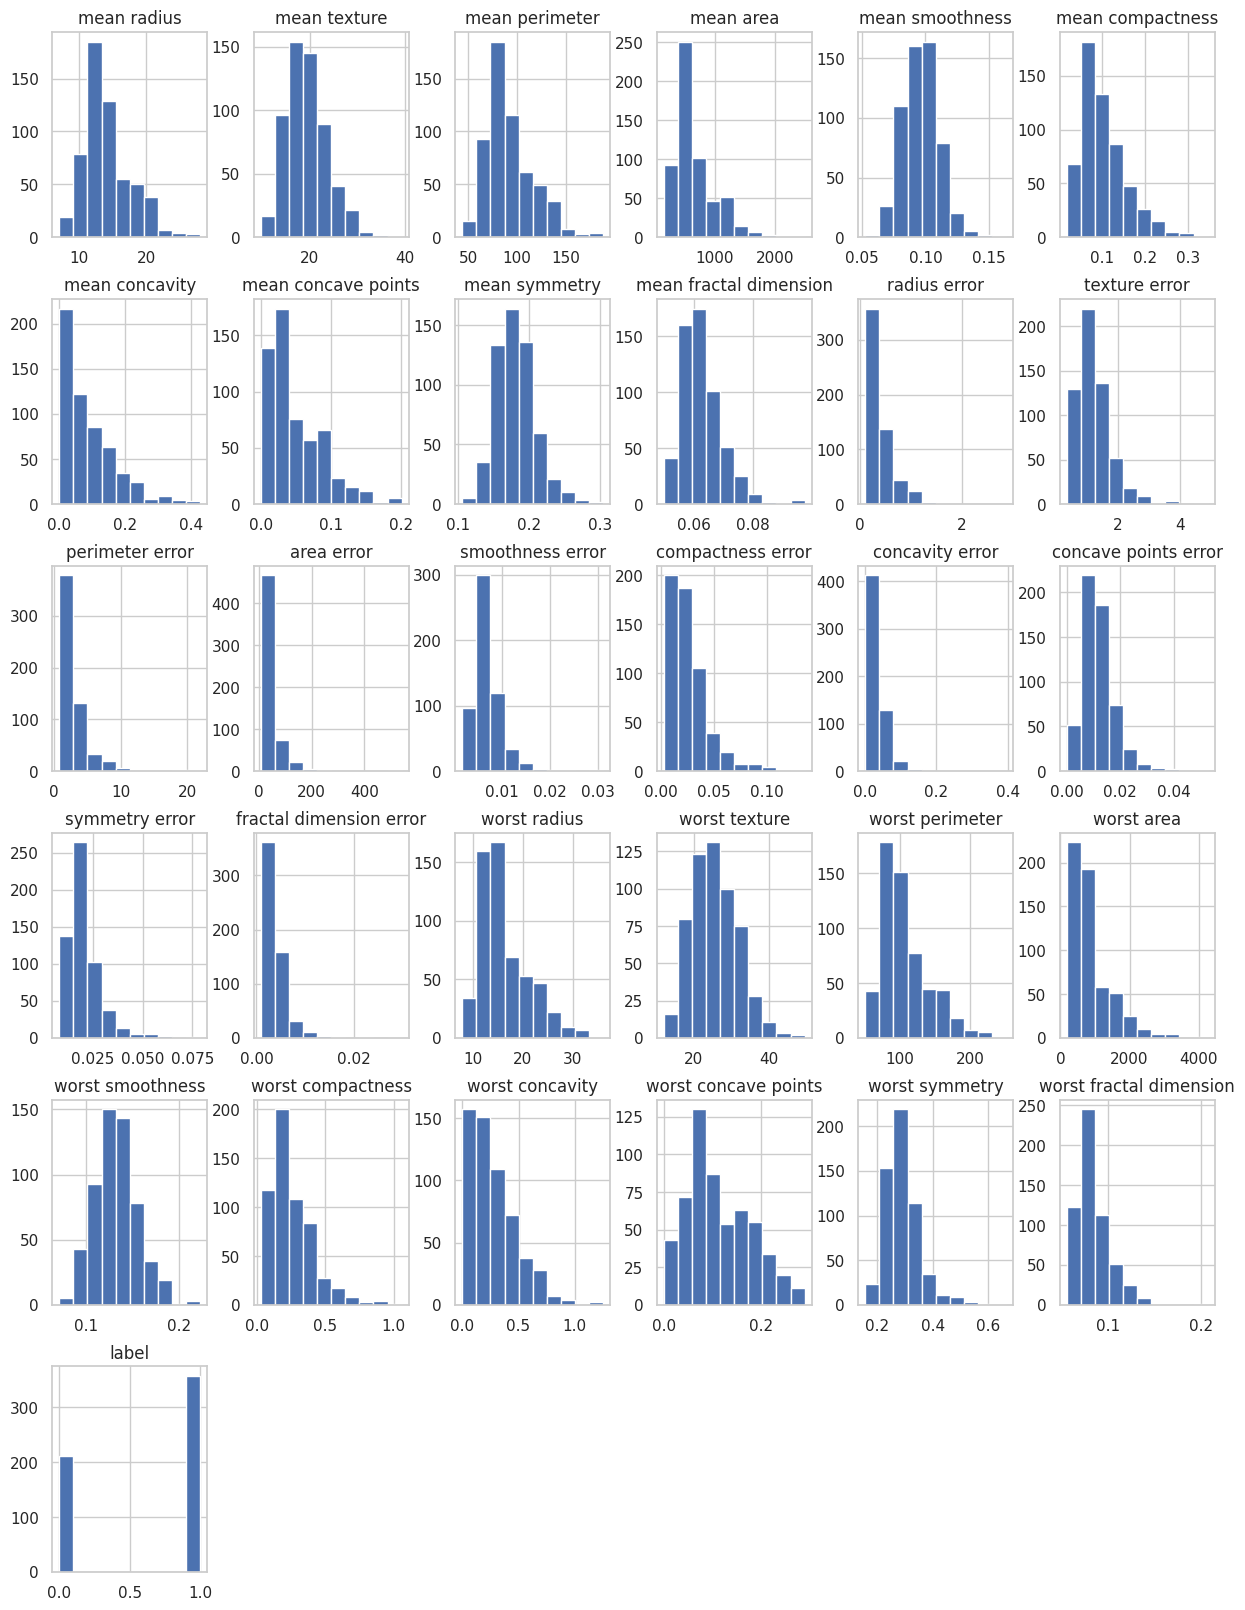

In [13]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize=(15,20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [14]:
# X, Y 분할 및 train, test 분할
X=df.drop('label',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y=df['label']
y.value_counts()

,count
label,
1,357
0,212


In [16]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


## 원-핫 인코딩
- 범주형(카테고리형) 데이터를 숫자로 변환하는 방법 중 하나
- 각 범주(Category)를 고유한 이진 벡터(Binary Vector)로 변환
- 머신러닝 알고리즘은 숫자 데이터를 입력으로 받으므로, 텍스트 데이터를 수치화하는 과정이 필요
![image.png](attachment:4b1d6ba8-3ea7-47f7-bf6c-b5d158ad1f9c.png)

- 왜 원-핫 인코딩을 사용하는가?
  - 범주형 데이터를 수치화하여 머신러닝 모델에 입력할 수 있도록 변환
  - 순서 없는 카테고리 데이터를 적절하게 표현
    - 예를 들어, 'Red', 'Green', 'Blue'를 1, 2, 3으로 변환하면 순서 정보가 생겨 모델이 잘못 학습할 가능성이 있음
    - 원-핫 인코딩을 사용하면 이런 문제를 방지할 수 있음
  - 다양한 알고리즘(선형 회귀, 신경망 등)에서 범주형 데이터를 효과적으로 활용 가능

- 참고: https://chatgpt.com/share/67e3989a-ed0c-8011-9188-0a21111f3967

In [17]:
# 원 핫 인코딩
Y = pd.get_dummies(y).values

# 여기선 테스팅으로 인코딩하신듯함?

In [18]:
# 딥러닝을 위해 numpy로 변환
X = X.values

In [19]:
print(X.shape, y.shape)

(569, 30) (569,)


In [36]:
# train, test값 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

## 정규화
- 입력 데이터를 일정한 범위로 맞춰주는 것
- 보통은 0~1 사이, 또는 평균 0, 표준편차 1로 바꾼다.

### 정규화를 하는 이유
- 모델이 더 빠르게, 더 안정적으로 학습할 수 있다.
- 입력값의 범위가 너무 크면 뉴런이 너무 커진 숫자 때문에 비정상적으로 동작하고, 특히 **활성화 함수가 제대로 작동 안 할 수 있음**

-> ReLU, Sigmoid, Tanh 같은 함수들은 입력이 너무 크면
출력이 거의 고정돼버려서 학습이 멈춘다. (이걸 기울기 소실이라고 함)

## Binary Crossentropy (이진 교차 엔트로피)
- Binary Crossentropy는 이진 분류(binary classification) 문제에서 주로 사용
- 출력 레이블이 0 또는 1인 경우
### 동작 방식
- True class: 클래스가 실제로 1일 때 예측 확률이 1에 가까워야 손실이 적다.
- False class: 클래스가 실제로 0일 때 예측 확률이 0에 가까워야 손실이 적다.
### 예시
- 예측값이 0.8일 때, 실제 값이 1이라면 손실이 적고, 실제 값이 0이라면 손실이 크다.
- 예측값이 0.2일 때, 실제 값이 0이라면 손실이 적고, 실제 값이 1이라면 손실이 크다.

## Categorical Crossentropy (다중 클래스 교차 엔트로피)
- Categorical Crossentropy는 다중 클래스 분류 문제에서 사용
- 출력 레이블이 여러 클래스 중 하나로 분류되는 경우
### 동작 방식
- One-Hot Encoding: 실제 값은 **one-hot 벡터 형식**으로 표현된다.
예를 들어, 클래스가 고양이, 강아지, 새라면:
고양이를 예측했을 때 실제 값은 [1, 0, 0] (고양이)
강아지를 예측했을 때 실제 값은 [0, 1, 0] (강아지)
새를 예측했을 때 실제 값은 [0, 0, 1] (새)
예측된 확률 값은 각 클래스에 대한 확률 분포 (0과 1 사이의 값)이다.
### 예시
- 예를 들어, 3개의 클래스(고양이, 강아지, 새)가 있고, 예측 확률이 [0.7, 0.2, 0.1]일 때, 실제 값이 [1, 0, 0](고양이)라면 교차 엔트로피는 -log(0.7)가 된다.

참고: https://chatgpt.com/share/67e3989a-ed0c-8011-9188-0a21111f3967

### Softmax 함수
- Softmax 함수는 다중 클래스 분류 문제에서 주로 사용되는 활성화 함수
- 주로 출력층에 사용되며, 모델이 각 클래스에 대한 확률을 출력하도록 만든다.
- 각 클래스에 대해 예측된 점수 (logits)를 **0과 1 사이의 확률로 변환**합니다. 또한, **모든 클래스의 확률 합이 1이 되도록 정규화**됩니다.

In [47]:
# 딥러닝 시작
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD,Adam

# 머신 정의
model = Sequential()

# ReLU (Rectified Linear Unit) 활성화 함수 사용
model.add(Dense(100,input_shape=(30,),activation='relu', name='relu1'))
model.add(Dense(50,activation='relu', name='relu2'))
model.add(Dense(20,activation='relu', name='relu3'))
model.add(Dense(2,activation='softmax', name='softmax1'))


# Categorical Crossentropy 손실함수 적용, 다중 클래스 분류
# Adam: 적응적 학습률 지정
model.compile(Adam(learning_rate=0.09),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ relu1 (Dense)                        │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu2 (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu3 (Dense)                        │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax1 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,212 (35.98 KB)

 Trainable params: 9,212 (35.98 KB)

 Non-trainable params: 0 (0.00 B)

## model.fit
- model.fit을 통해 모델을 학습한다.
- epochs=30: 각 반복을 epoch라고 하며, 모델이 학습 데이터 전체를 한 번씩 사용하는 주기를 의미한다.
  - 여기선 epoch를 30으로 지정했다.
- batch_size=32: 한 번에 32개 샘플씩 모델에 데이터를 전달하며 학습한다. 이 값은 모델이 파라미터를 업데이트하는 빈도를 설정한다.
- validation_data=(X_test, y_test): 학습하는 동안 검증 데이터로 X_test와 y_test를 사용한다. 학습 중 모델 성능을 평가하는 데 사용된다.
- 즉 model_history는 학습 진행 상황에 대한 기록을 담고 있으며, **학습 곡선(loss, accuracy 등)**을 확인할 수 있다.

## model.predict(X_test)
- 학습된 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행한다. y_pred는 모델이 예측한 확률 값이다.
- 만약 마지막 레이어가 **softmax**라면, y_pred는 각 클래스에 대한 **확률을 출력**합니다.

### argmax
- 각 샘플의 예측된 클래스 확률이 가장 큰 값의 인덱스를 반환한다. 즉, 모델이 예측한 클래스를 추출하는것.

참고: https://chatgpt.com/share/67e3989a-ed0c-8011-9188-0a21111f3967

In [48]:
# model.fit을 통해 모델을 학습한다.
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5742 - loss: 1.2673 - val_accuracy: 0.6667 - val_loss: 0.6167
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7571 - loss: 0.5593 - val_accuracy: 0.8246 - val_loss: 0.3806
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8776 - loss: 0.3138 - val_accuracy: 0.9123 - val_loss: 0.2058
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8948 - loss: 0.2739 - val_accuracy: 0.9123 - val_loss: 0.1985
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.2031 - val_accuracy: 0.8860 - val_loss: 0.2158
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9084 - loss: 0.2158 - val_accuracy: 0.9298 - val_loss: 0.1852
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8984 - loss: 0.2355 - val_accuracy: 0.9474 - val_loss: 0.1753
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8849 - loss: 0.3083 - val_accuracy: 0.9123 - val_loss

- model_history.history: 모델 학습 과정에서 기록된 학습 관련 정보를 담고 있는 딕셔너리
- loss = model_history.history['loss']: 훈련 데이터에 대한 손실값
- val_loss = model_history.history['val_loss']: 검증 데이터에 대한 손실 값
- epochs = range(1, len(loss) + 1)
  - epochs는 학습이 진행된 각 epoch을 나타내는 범위
  - epochs는 1부터 시작하여 loss와 val_loss의 길이만큼 진행된다.
- plt.plot(epochs, loss, 'y', label='Training loss')
  - epochs를 x축으로, 훈련 손실 loss를 y축으로 그래프를 그리는데, 'y'는 선 색깔을 노란색(yellow)로 설정
- plt.plot(epochs, val_loss, 'r', label='Validation loss')
  - epochs를 x축으로, 검증 손실 val_loss를 y축으로 그래프를 그리는데, 선 색깔을 빨간색(red)로 설정하고, 레이블을 'Validation loss'로 설정

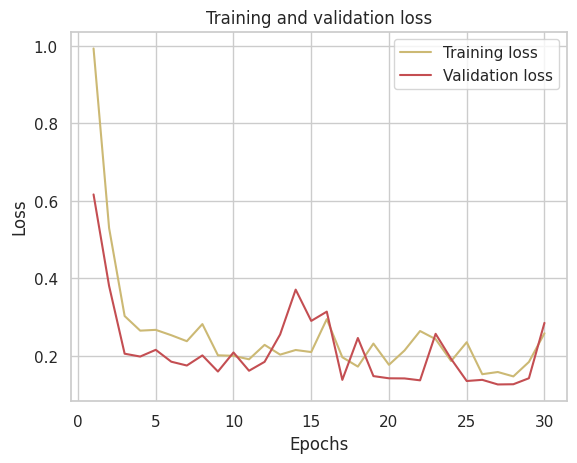

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

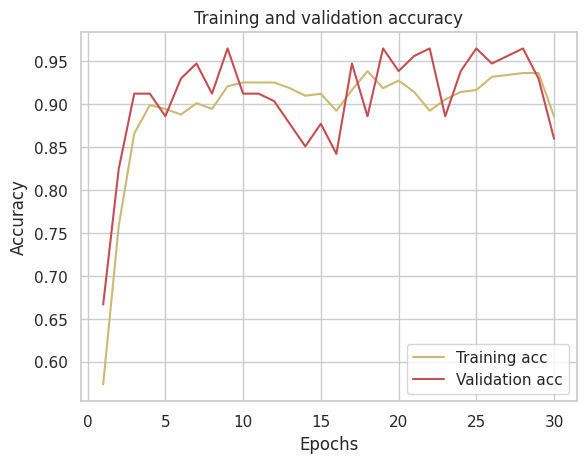

In [50]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.66      0.79        47
           1       0.81      1.00      0.89        67

    accuracy                           0.86       114
   macro avg       0.90      0.83      0.84       114
weighted avg       0.89      0.86      0.85       114

[[31 16]
 [ 0 67]]


-  classification_report(...): 예측 결과의 정밀도, 재현율, F1-score, 정확도 등을 한눈에 보여주는 리포트
- confusion_matrix(...): 예측이 얼마나 맞았는지 행렬로 정리한 것 (일명 오차 행렬)

# 머신러닝 수행
- DT, LR, RF, SVM 진행

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=df.drop('label',axis=1)
y=df['label']

print(X.shape, y.shape)
# 정수 라벨 확인

(569, 30) (569,)


In [72]:
# 훈련 데이터와 테스트 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# 전처리(표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train) # StandardScaler 꼭 train 데이터의 input으로 해줘야한다.
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [74]:
print("=====RandomForestClassifier=====")
rf = RandomForestClassifier()

rf.fit(train_scaled, y_train)
y_pred = rf.predict(test_scaled)

accuracy  = accuracy_score(y_test, y_pred)
print("정확도: ", accuracy)

=====RandomForestClassifier=====
정확도:  0.9649122807017544


In [75]:
print("=====DecisionTreeClassifier=====")
dt = DecisionTreeClassifier()

dt.fit(train_scaled, y_train)
y_pred = dt.predict(test_scaled)

accuracy  = accuracy_score(y_test, y_pred)
print("정확도: ", accuracy)

=====DecisionTreeClassifier=====
정확도:  0.9385964912280702


In [77]:
print("=====LogisticRegression=====")
lr = LogisticRegression()

lr.fit(train_scaled, y_train)
y_pred = lr.predict(test_scaled)

accuracy  = accuracy_score(y_test, y_pred)
print("정확도: ", accuracy)

=====LogisticRegression=====
정확도:  0.9736842105263158


In [78]:
print("=====SVC =====")
svc = SVC ()

svc.fit(train_scaled, y_train)
y_pred = svc.predict(test_scaled)

accuracy  = accuracy_score(y_test, y_pred)
print("정확도: ", accuracy)

=====SVC =====
정확도:  0.9824561403508771
